In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
## Upload the dataset
df = pd.read_csv('World_Happiness_Report_2005-2021.csv')

In [3]:
df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [4]:
## Data Cleaning
#Null
df.isnull().sum()

Country name                           0
Year                                   0
Life Ladder                            0
Log GDP per capita                    27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       1747 non-null   object 
 1   Year                               1747 non-null   int64  
 2   Life Ladder                        1747 non-null   float64
 3   Log GDP per capita                 1747 non-null   float64
 4   Social support                     1747 non-null   float64
 5   Healthy life expectancy at birth   1747 non-null   float64
 6   Freedom to make life choices       1747 non-null   float64
 7   Generosity                         1747 non-null   float64
 8   Perceptions of corruption          1747 non-null   float64
 9   Positive affect                    1747 non-null   float64
 10  Negative affect                    1747 non-null   float64
 11  Confidence in national government  1747 non-null   float64
dt

In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
## Random Forest Regressor
x = df.drop(df.columns[0:3], axis = 1).values
y = df.iloc[:,2].values.reshape(-1,1)

In [9]:
x

array([[ 7.30257368,  0.45066231, 50.5       , ...,  0.41429704,
         0.25819549,  0.61207211],
       [ 7.47244644,  0.55230844, 50.79999924, ...,  0.48142144,
         0.23709242,  0.6115452 ],
       [ 7.57918262,  0.5390752 , 51.09999847, ...,  0.51690668,
         0.27532381,  0.29935741],
       ...,
       [ 8.19699764,  0.75916231, 53.09999847, ...,  0.65843368,
         0.23535433,  0.45645502],
       [ 8.117733  ,  0.71724266, 53.57500076, ...,  0.66065806,
         0.34573638,  0.57730186],
       [ 8.15324783,  0.6851505 , 54.04999924, ...,  0.60991722,
         0.24168187,  0.66570318]])

In [10]:
x.shape

(1747, 9)

In [11]:
y.shape

(1747, 1)

In [12]:
#Splitting Test/Train size
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [13]:
rdr = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 42)

In [14]:
rdr.fit(X_train,y_train)

C:\Users\cem-c\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=5, random_state=42)

In [15]:
y_test_pred = rdr.predict(X_test)

In [16]:
r2_test = r2_score(y_test,y_test_pred)

In [17]:
print(f"The R2 score of the model: {r2_test}")

The R2 score of the model: 0.8315818305332863


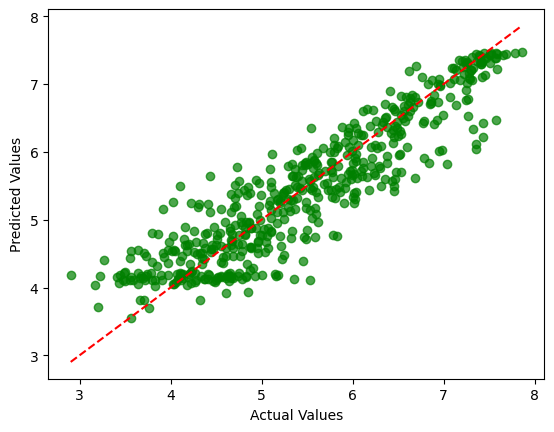

In [18]:
plt.scatter(y_test,y_test_pred, alpha = 0.7, color = 'green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], color = 'red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()